In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
cd /g/data/tm70/as2285/payu/MOM6-CICE6/archive/output000

/scratch/tm70/as2285/access-om3/archive/MOM6-CICE6/output000


In [4]:
file = ! ls access-om3.cice.1900-01-*.nc

In [5]:
file

['access-om3.cice.1900-01-01.nc']

In [6]:
cice_ds = xr.open_dataset(file[0])

In [7]:
list(cice_ds.variables)

['time',
 'time_bounds',
 'TLON',
 'TLAT',
 'ULON',
 'ULAT',
 'NLON',
 'NLAT',
 'ELON',
 'ELAT',
 'NCAT',
 'VGRDi',
 'VGRDs',
 'VGRDb',
 'VGRDa',
 'tmask',
 'umask',
 'nmask',
 'emask',
 'blkmask',
 'tarea',
 'uarea',
 'narea',
 'earea',
 'dxt',
 'dyt',
 'dxu',
 'dyu',
 'dxn',
 'dyn',
 'dxe',
 'dye',
 'HTN',
 'HTE',
 'ANGLE',
 'ANGLET',
 'lont_bounds',
 'latt_bounds',
 'lonu_bounds',
 'latu_bounds',
 'lonn_bounds',
 'latn_bounds',
 'lone_bounds',
 'late_bounds',
 'hi',
 'hs',
 'aice',
 'uvel',
 'vvel',
 'frzmlt',
 'congel',
 'frazil',
 'snoice',
 'dvidtt',
 'dvidtd',
 'sifb']

In [8]:
cice_gridvars = [
    'TLON',
 'TLAT',
 'ULON',
 'ULAT',
 'NLON',
 'NLAT',
 'ELON',
 'ELAT',
 'tmask',
 'umask',
 'nmask',
 'emask',
 'blkmask',
 'tarea',
 'uarea',
 'narea',
 'earea',
 'dxt',
 'dyt',
 'dxu',
 'dyu',
 'dxn',
 'dyn',
 'dxe',
 'dye',
 'HTN',
 'HTE',
 'ANGLE',
 'ANGLET',
 ]

In [9]:
cice_ds[cice_gridvars]

<xarray.Dataset> Size: 25MB
Dimensions:  (nj: 300, ni: 360)
Coordinates:
    TLON     (nj, ni) float64 864kB ...
    TLAT     (nj, ni) float64 864kB ...
    ULON     (nj, ni) float64 864kB ...
    ULAT     (nj, ni) float64 864kB ...
    NLON     (nj, ni) float64 864kB ...
    NLAT     (nj, ni) float64 864kB ...
    ELON     (nj, ni) float64 864kB ...
    ELAT     (nj, ni) float64 864kB ...
Dimensions without coordinates: nj, ni
Data variables: (12/21)
    tmask    (nj, ni) float64 864kB ...
    umask    (nj, ni) float64 864kB ...
    nmask    (nj, ni) float64 864kB ...
    emask    (nj, ni) float64 864kB ...
    blkmask  (nj, ni) float64 864kB ...
    tarea    (nj, ni) float64 864kB ...
    ...       ...
    dxe      (nj, ni) float64 864kB ...
    dye      (nj, ni) float64 864kB ...
    HTN      (nj, ni) float64 864kB ...
    HTE      (nj, ni) float64 864kB ...
    ANGLE    (nj, ni) float64 864kB ...
    ANGLET   (nj, ni) float64 864kB ...
Attributes:
    title:               access-om3
    contents:            Diagnostic and Prognostic Variables
    source:              CICE Sea Ice Model, unknown_version_name
    comment:             All years have exactly 365 days
    comment2:            File written on model date 19000102
    comment3:            seconds elapsed into model date:      0
    time_period_freq:    day_1
    time_axis_position:  middle
    conventions:         CF-1.0
    history:             This dataset was created on 2024-11-07 at 11:01
    io_flavor:           io_pio2 hdf5

Sanity check cice fields:

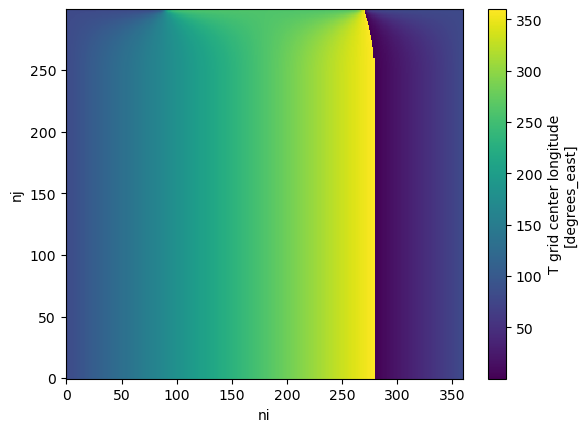

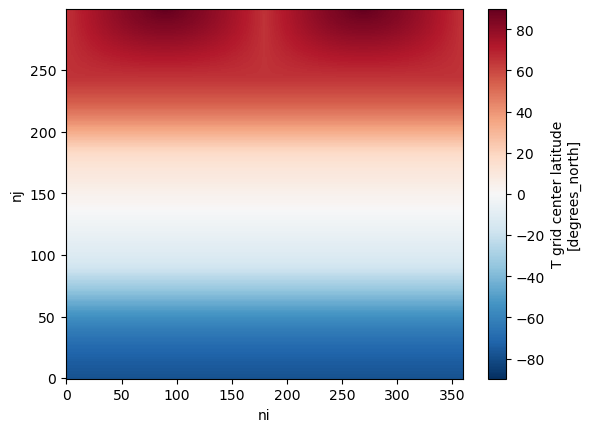

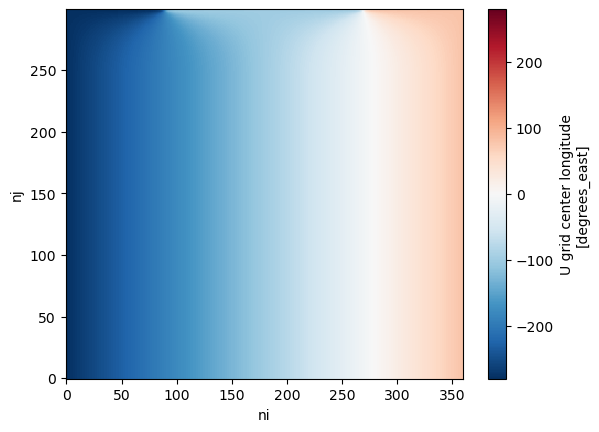

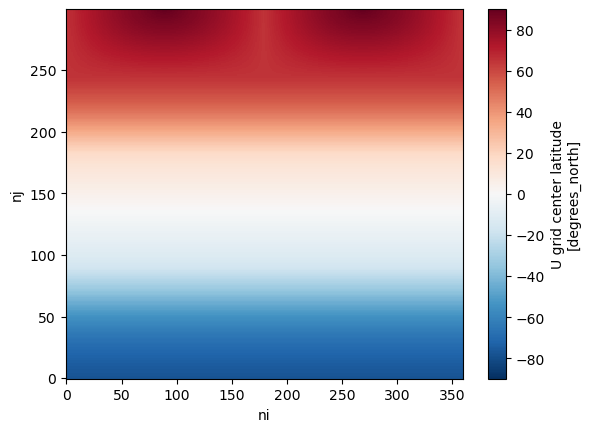

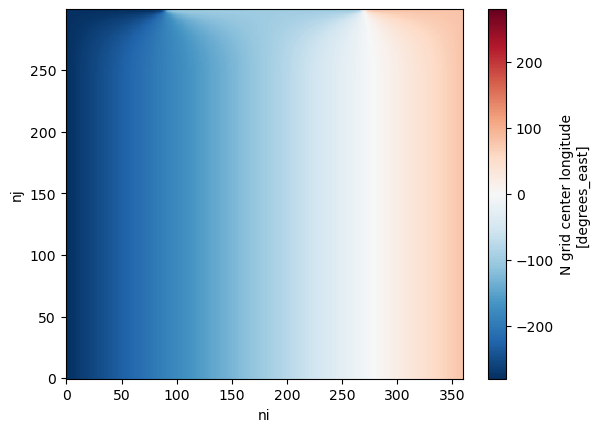

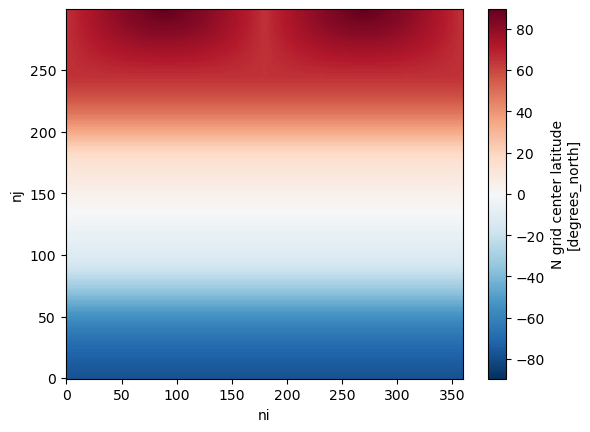

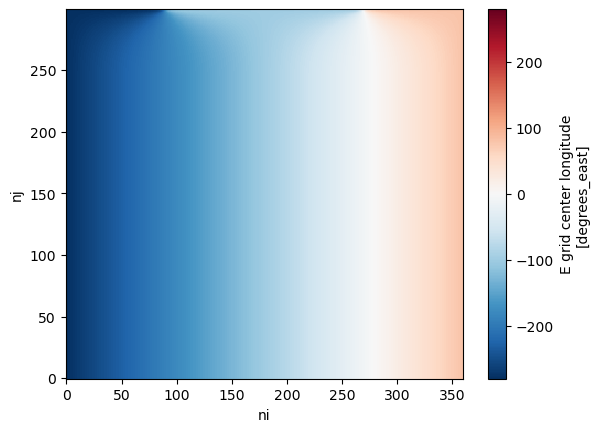

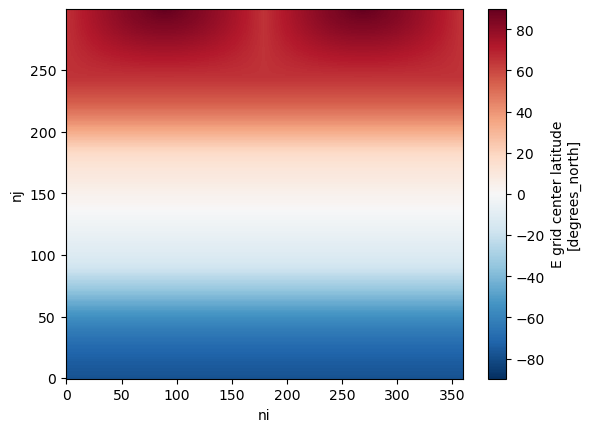

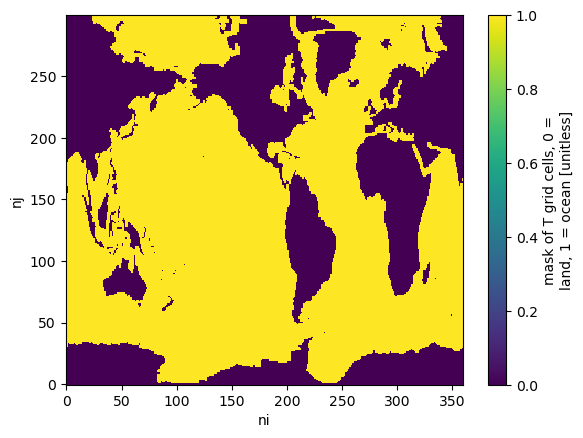

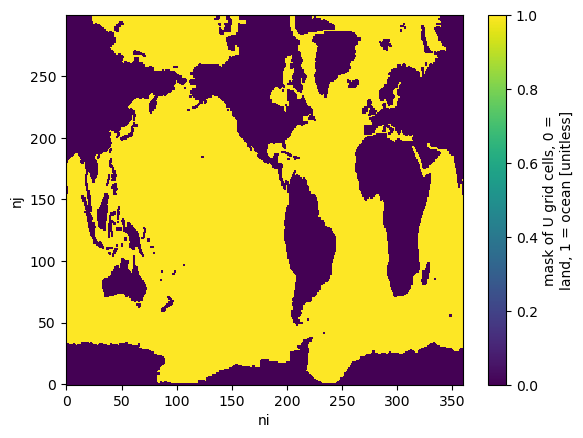

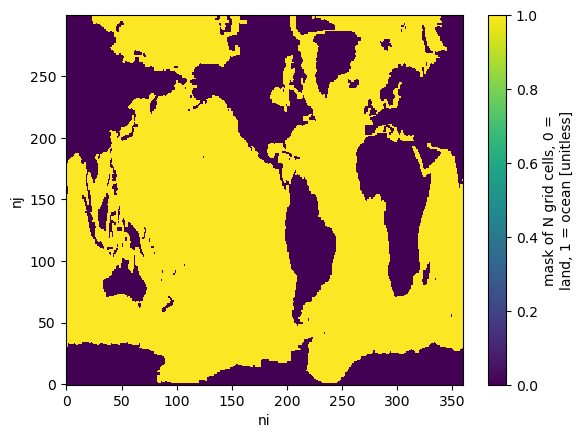

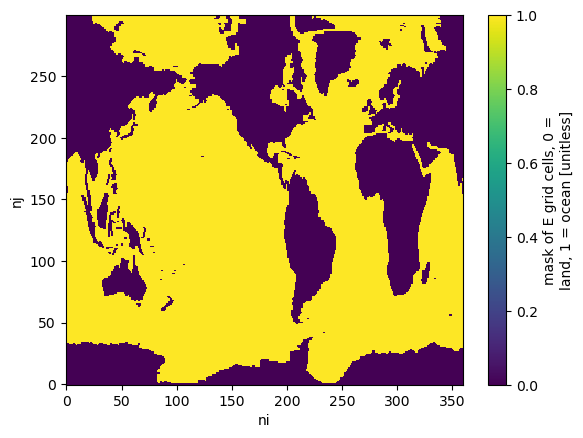

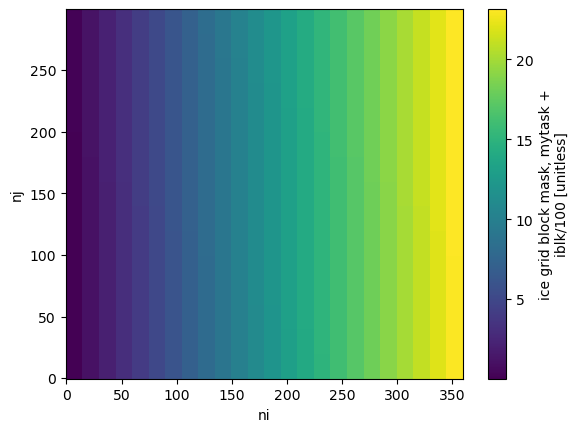

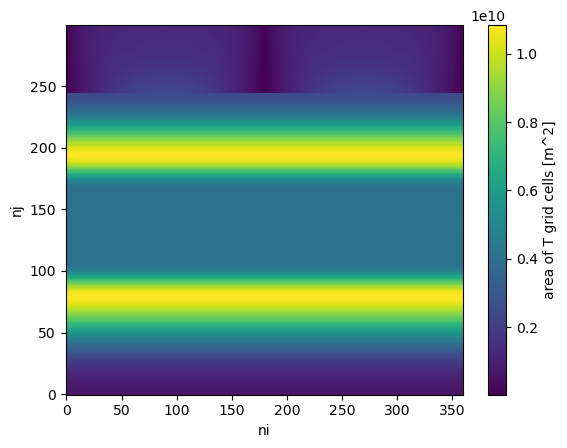

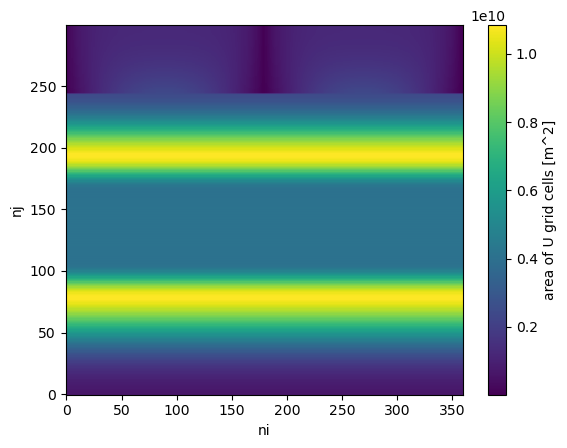

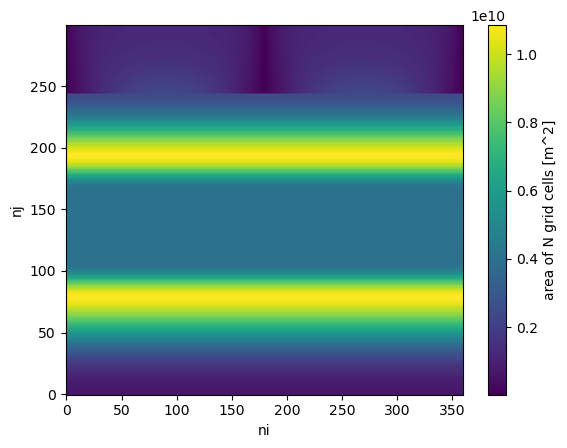

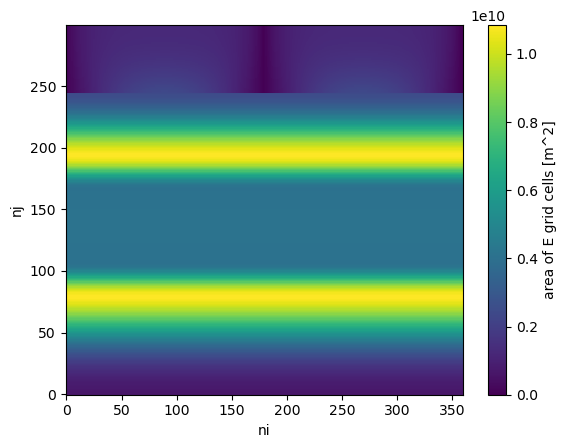

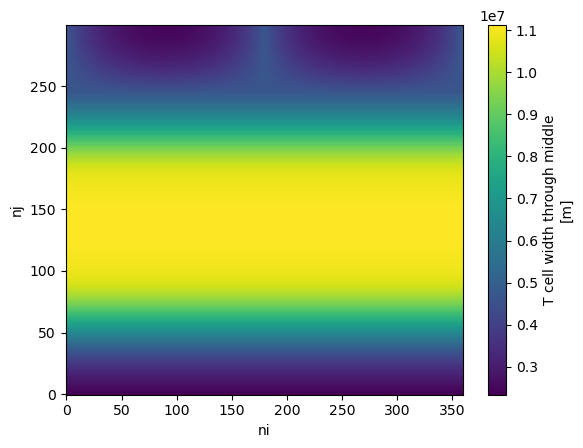

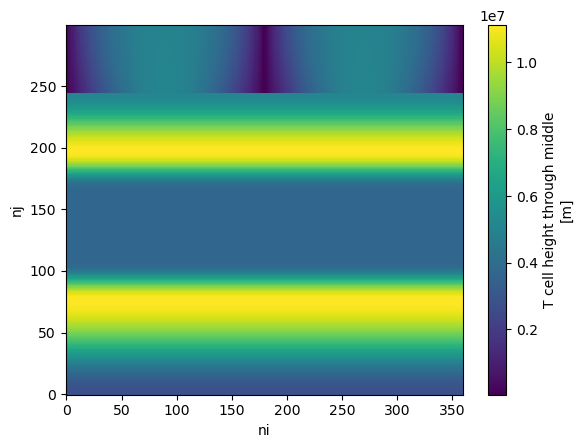

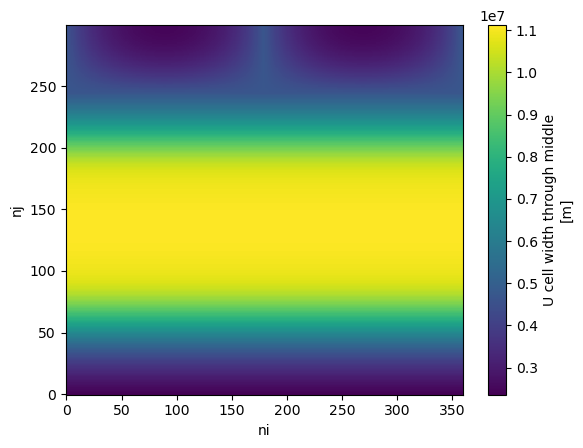

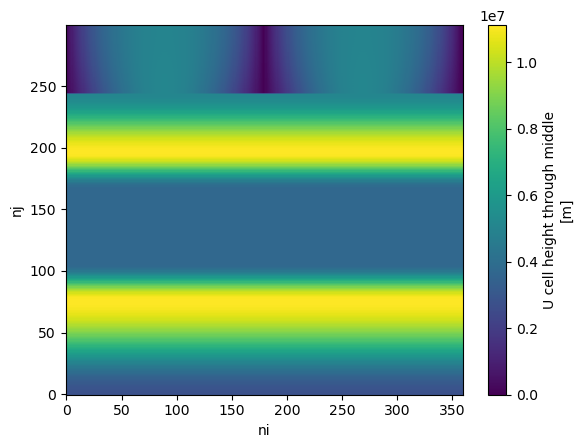

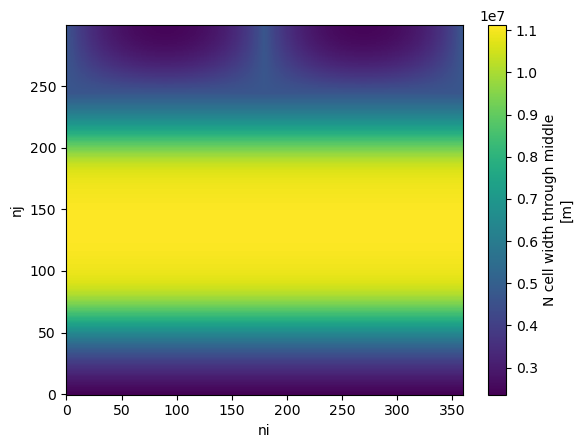

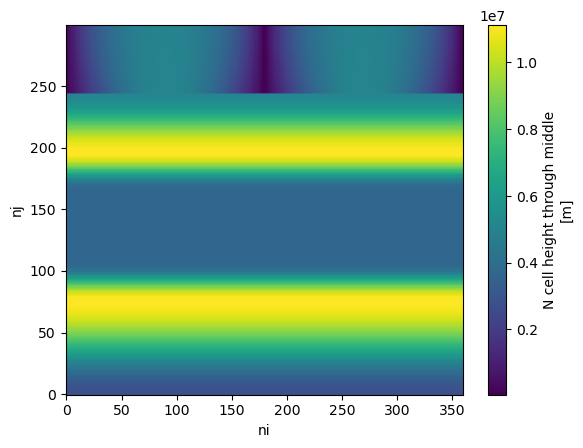

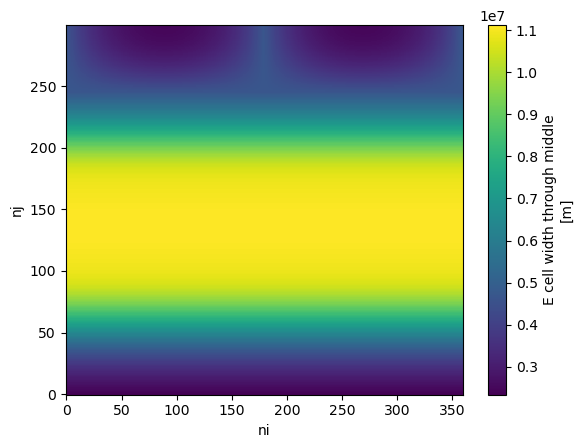

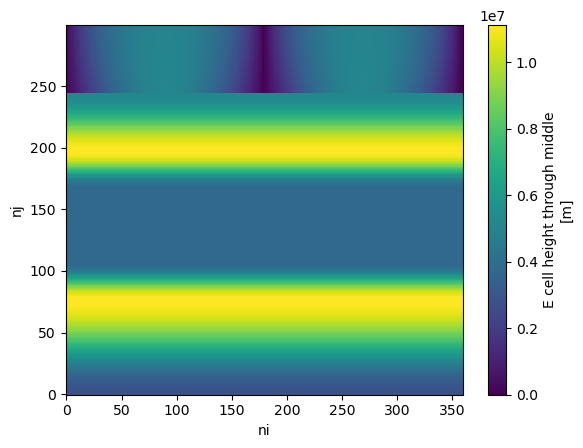

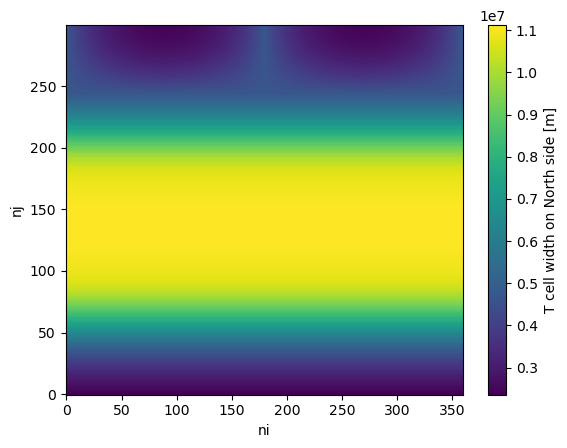

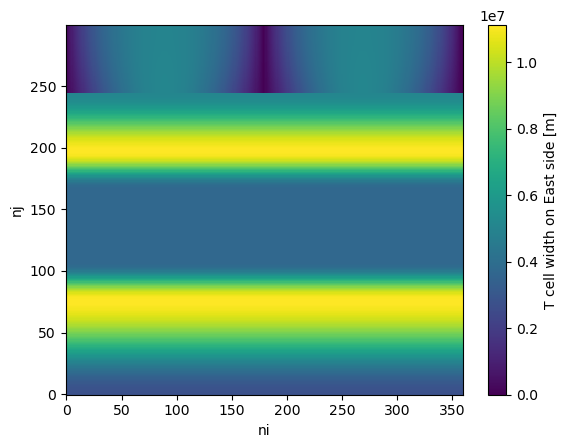

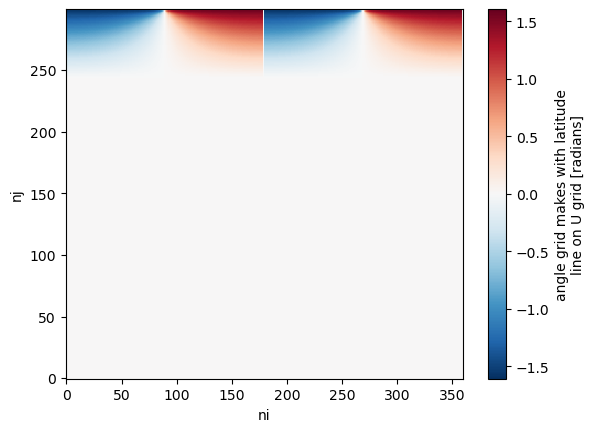

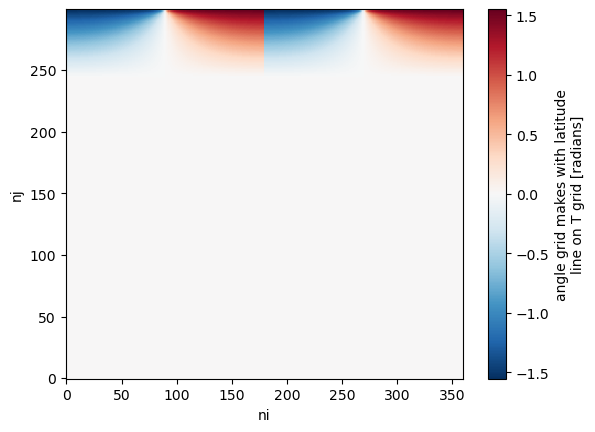

In [10]:
for g in cice_gridvars:
    cice_ds[g].plot()
    plt.show()

In [11]:
mom_ds = xr.open_dataset('access-om3.mom6.h.static.nc')

In [12]:
mom_ds

<xarray.Dataset> Size: 14MB
Dimensions:       (xh: 360, yh: 300, time: 1, xq: 360, yq: 300)
Coordinates:
  * xh            (xh) float64 3kB -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * yh            (yh) float64 2kB -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
  * time          (time) object 8B 0001-01-01 00:00:00
  * xq            (xq) float64 3kB -279.0 -278.0 -277.0 ... 78.0 79.0 80.0
  * yq            (yq) float64 2kB -77.75 -77.51 -77.26 ... 89.1 89.55 90.0
Data variables: (12/32)
    geolon        (yh, xh) float32 432kB ...
    geolat        (yh, xh) float32 432kB ...
    geolon_c      (yq, xq) float32 432kB ...
    geolat_c      (yq, xq) float32 432kB ...
    geolon_u      (yh, xq) float32 432kB ...
    geolat_u      (yh, xq) float32 432kB ...
    ...            ...
    dxCu          (yh, xq) float32 432kB ...
    dyCu          (yh, xq) float32 432kB ...
    dxCv          (yq, xh) float32 432kB ...
    dyCv          (yq, xh) float32 432kB ...
    dxCvo         (yq, xh) float32 432kB ...
    dyCuo         (yh, xq) float32 432kB ...
Attributes:
    NumFilesInSet:  1
    title:          MOM6 diagnostic fields table
    grid_type:      regular
    grid_tile:      N/A

The MOM grid is only at single precision. So we only expect about 7 decimal digit accuracy.

# Compare angles

For angles & lon/lat between 360 & -360, expect single precision would be 0.001

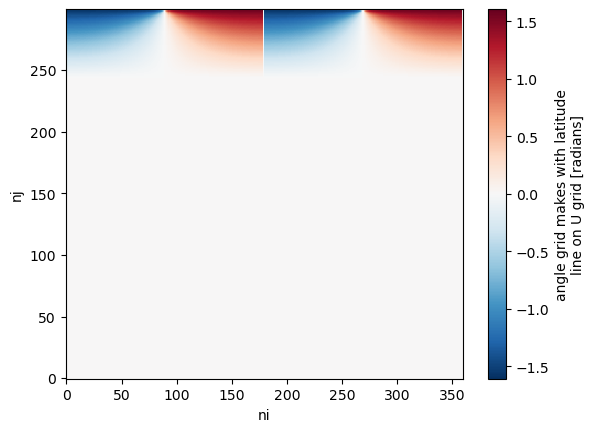

In [13]:
cice_ds['ANGLE'].plot()

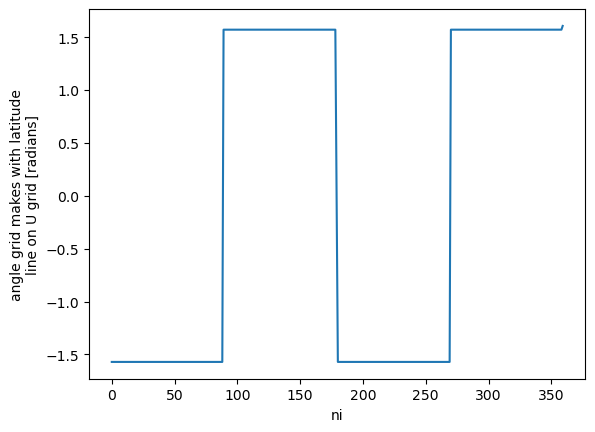

In [14]:
cice_ds['ANGLE'].isel(nj=-1).plot()

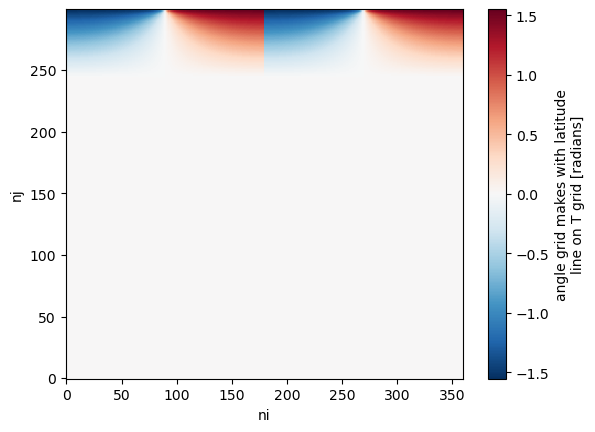

In [15]:
cice_ds['ANGLET'].plot()

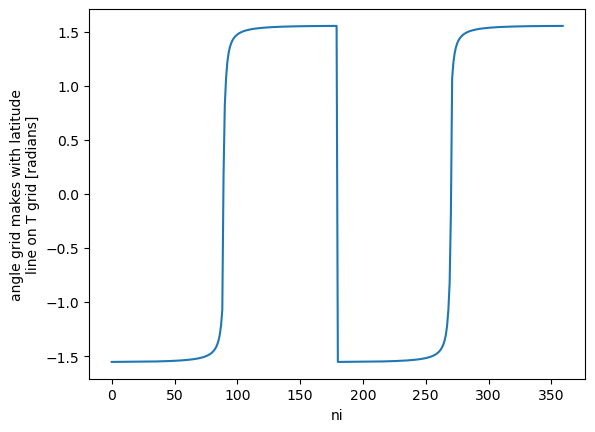

In [16]:
cice_ds['ANGLET'].isel(nj=-1).plot()

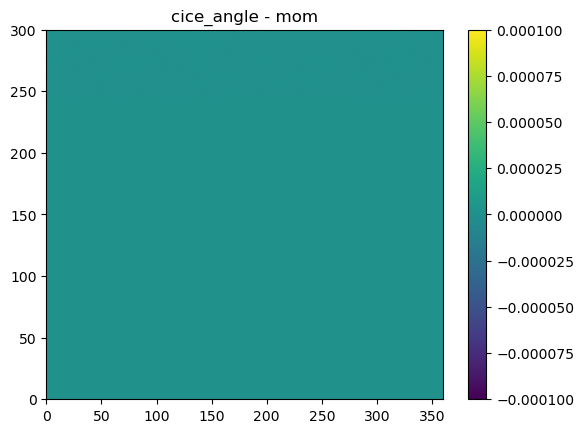

In [17]:
plt.pcolor(((np.sin(cice_ds['ANGLET'].values) - mom_ds['sin_rot']).values), vmin=-.0001, vmax=.0001)
plt.colorbar()
plt.title(f'cice_angle - mom')
plt.show()

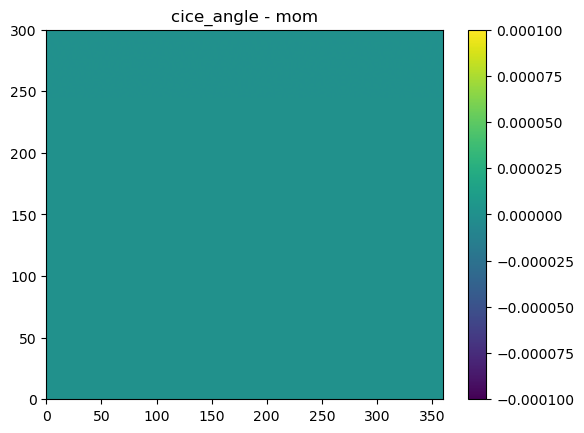

In [18]:
plt.pcolor(((np.cos(cice_ds['ANGLET'].values) - mom_ds['cos_rot']).values), vmin=-.0001, vmax=.0001)
plt.colorbar()
plt.title(f'cice_angle - mom')
plt.show()

# Compare lat / lon /masks

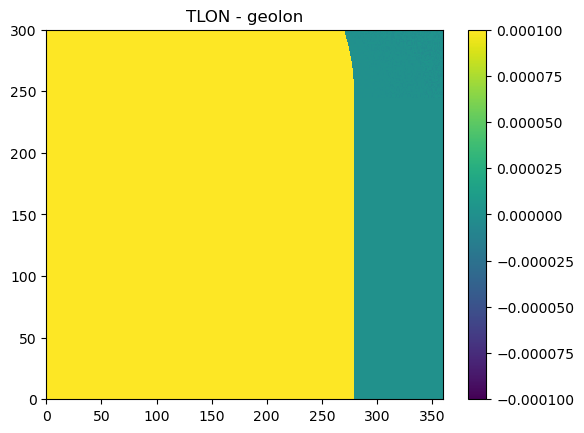

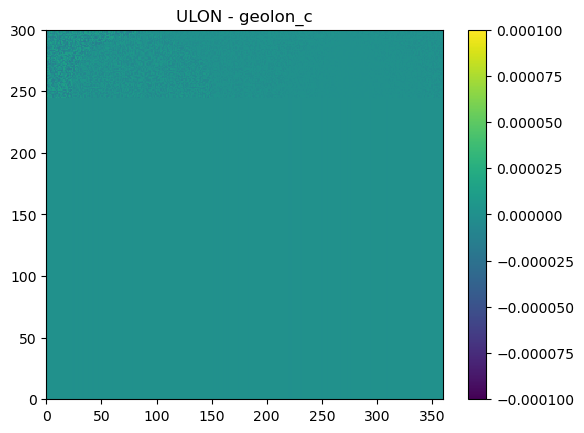

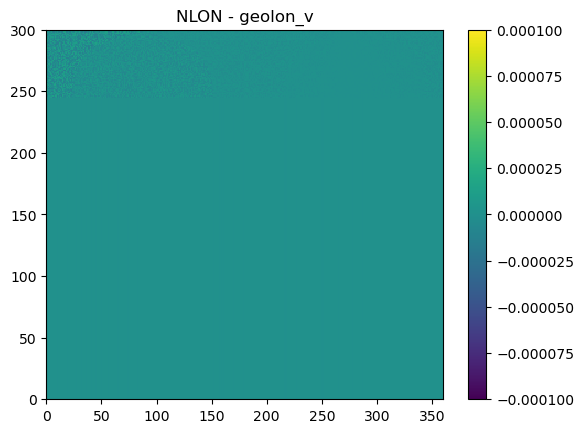

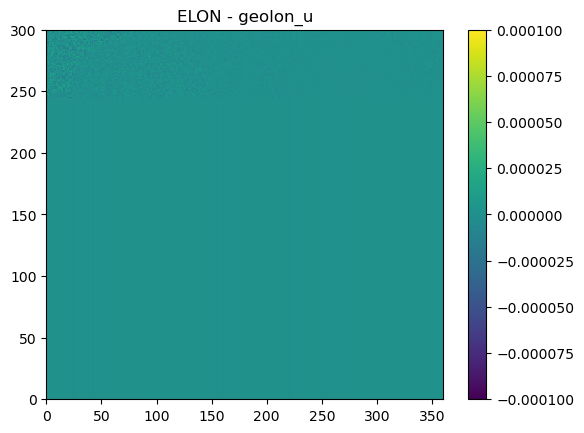

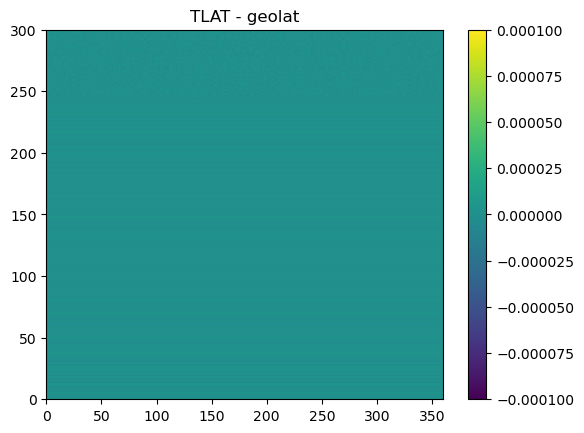

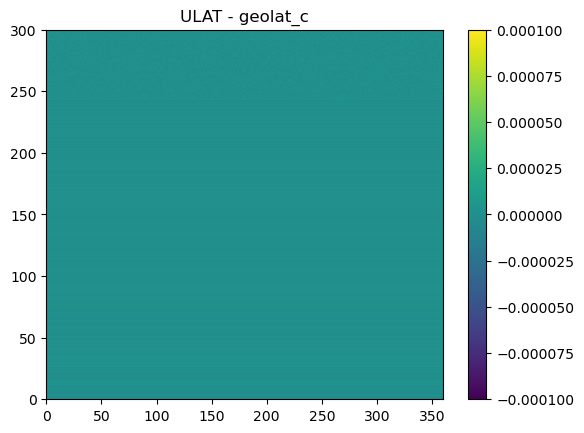

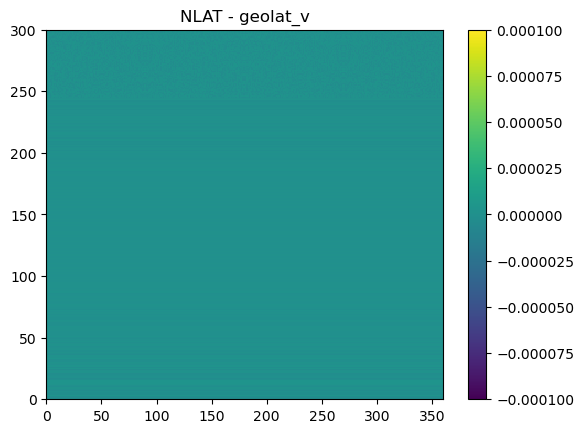

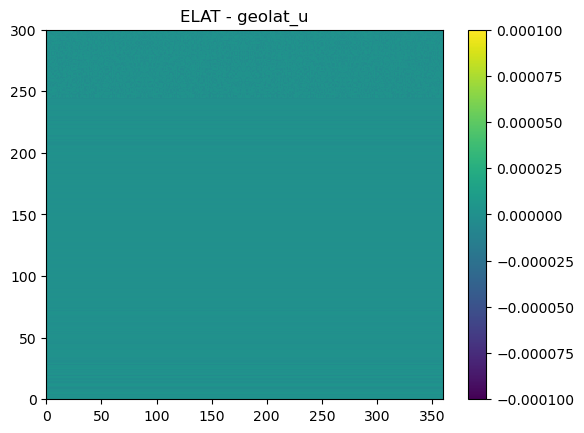

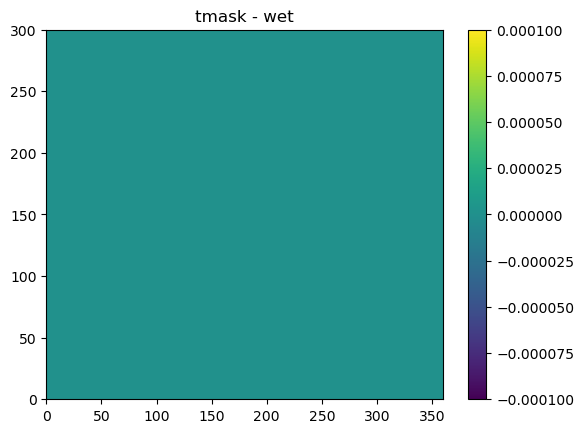

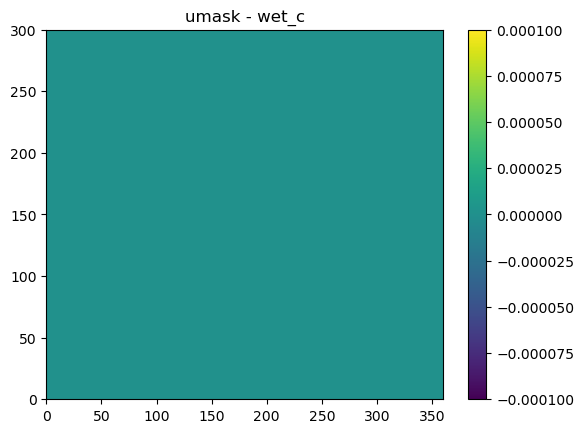

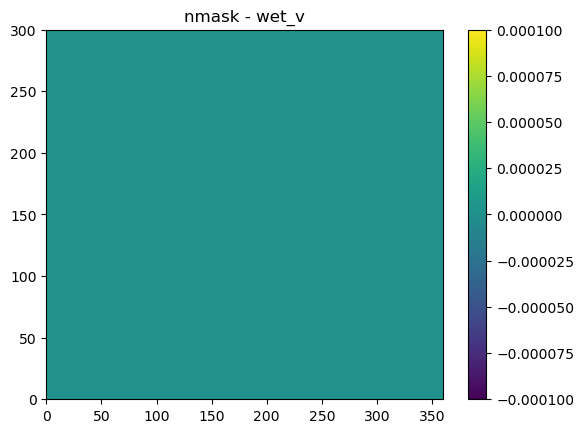

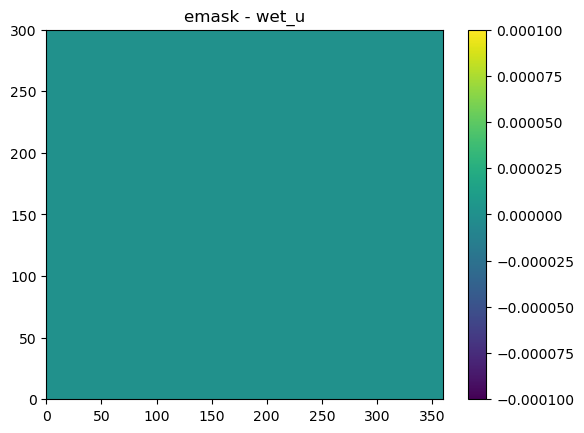

In [19]:
#mapping from CICE to MOM names
var_map = [
    ('TLON','geolon'),
    ('ULON', 'geolon_c'),
    ('NLON', 'geolon_v'),
    ('ELON', 'geolon_u'),
    ('TLAT','geolat'),
    ('ULAT', 'geolat_c'),
    ('NLAT', 'geolat_v'),
    ('ELAT', 'geolat_u'),
    ('tmask','wet'),
    ('umask','wet_c'),
    ('nmask','wet_v'),
    ('emask','wet_u'),
]

for c,m in var_map:
    plt.pcolor((cice_ds[c].values - (mom_ds[m]).values) , vmin=-1e-4, vmax=1e-4)
    plt.colorbar()
    plt.title(f'{c} - {m}')
    plt.show()

# Compare areas

In [20]:
cice_ds.tarea.max()

<xarray.DataArray 'tarea' ()> Size: 8B
array(1.0841568e+10)

In [21]:
mom_ds.areacello.max()

<xarray.DataArray 'areacello' ()> Size: 8B
array(1.08415683e+10)

single precision for area would be approx 1e4

In [22]:
mom_ds

<xarray.Dataset> Size: 14MB
Dimensions:       (xh: 360, yh: 300, time: 1, xq: 360, yq: 300)
Coordinates:
  * xh            (xh) float64 3kB -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * yh            (yh) float64 2kB -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
  * time          (time) object 8B 0001-01-01 00:00:00
  * xq            (xq) float64 3kB -279.0 -278.0 -277.0 ... 78.0 79.0 80.0
  * yq            (yq) float64 2kB -77.75 -77.51 -77.26 ... 89.1 89.55 90.0
Data variables: (12/32)
    geolon        (yh, xh) float32 432kB -279.5 -278.5 -277.5 ... 79.97 79.99
    geolat        (yh, xh) float32 432kB -77.88 -77.88 -77.88 ... 65.63 65.21
    geolon_c      (yq, xq) float32 432kB -279.0 -278.0 -277.0 ... 80.0 80.0 80.0
    geolat_c      (yq, xq) float32 432kB -77.75 -77.75 -77.75 ... 65.42 65.0
    geolon_u      (yh, xq) float32 432kB -279.0 -278.0 -277.0 ... 79.98 80.0
    geolat_u      (yh, xq) float32 432kB -77.88 -77.88 -77.88 ... 65.42 65.0
    ...            ...
    dxCu          (yh, xq) float32 432kB ...
    dyCu          (yh, xq) float32 432kB ...
    dxCv          (yq, xh) float32 432kB ...
    dyCv          (yq, xh) float32 432kB ...
    dxCvo         (yq, xh) float32 432kB ...
    dyCuo         (yh, xq) float32 432kB ...
Attributes:
    NumFilesInSet:  1
    title:          MOM6 diagnostic fields table
    grid_type:      regular
    grid_tile:      N/A

single precision is about ~1e4 precision

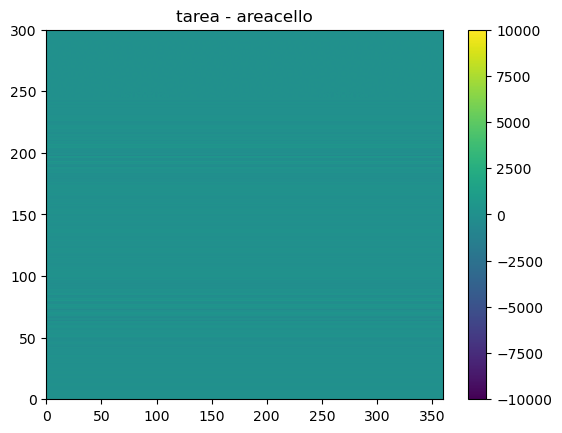

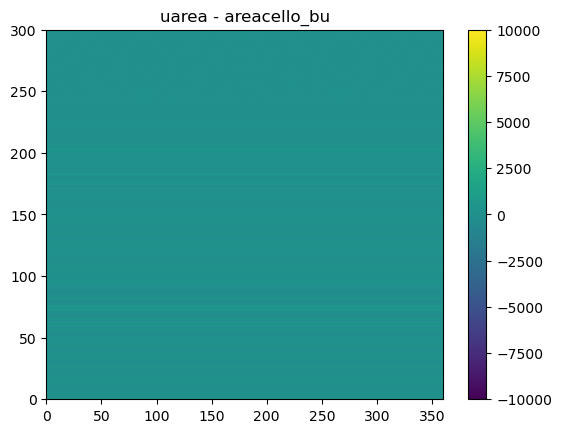

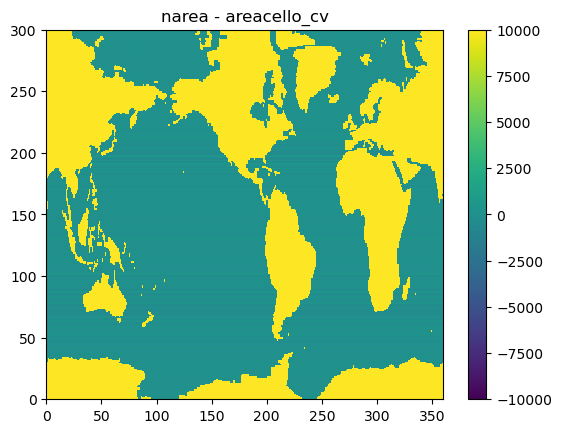

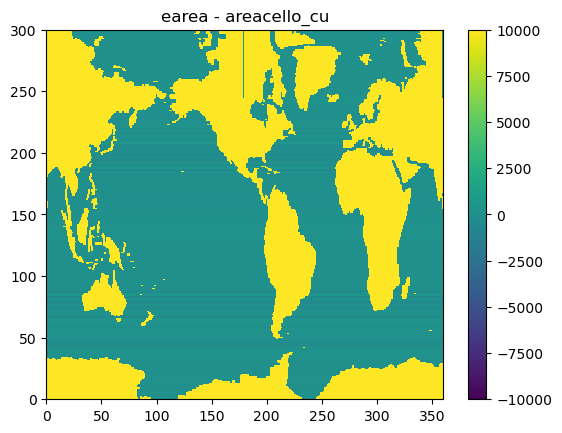

In [23]:
#mapping from CICE to MOM names
var_map = [
    ('tarea','areacello'),
    ('uarea','areacello_bu'),
    ('narea','areacello_cv'),
    ('earea','areacello_cu')
]

for c,m in var_map:
    plt.pcolor((cice_ds[c].values - (mom_ds[m]).values), vmin=-1e4, vmax=1e4)
    plt.colorbar()
    plt.title(f'{c} - {m}')
    plt.show()

MOM6 doesnt output bounds

In [24]:
bounds_vars = ['lont_bounds',
 'latt_bounds',
 'lonu_bounds',
 'latu_bounds',
 'lonn_bounds',
 'latn_bounds',
 'lone_bounds',
 'late_bounds']

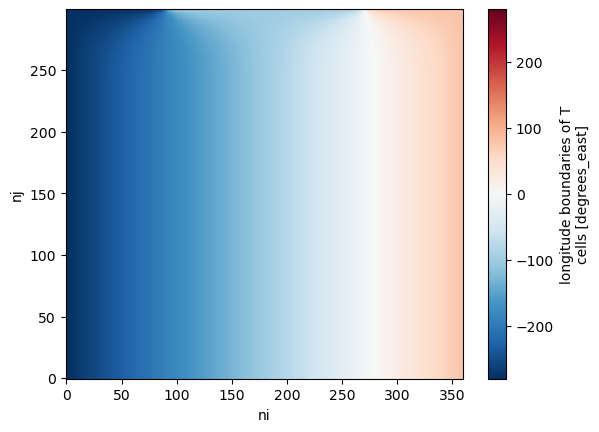

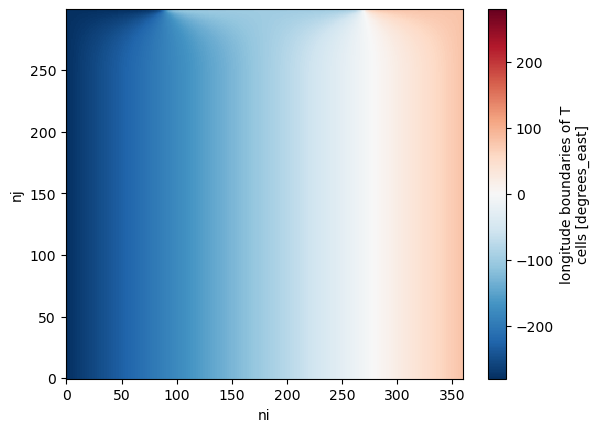

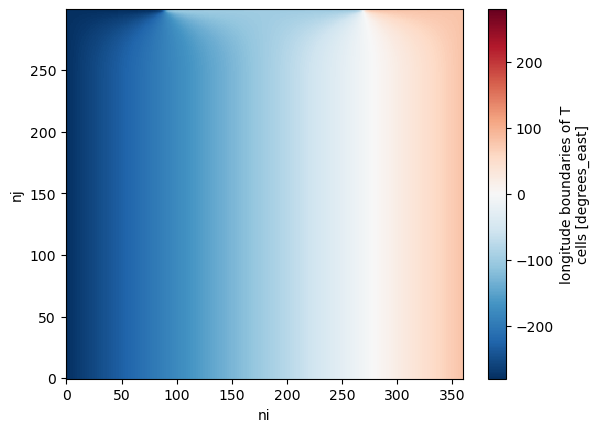

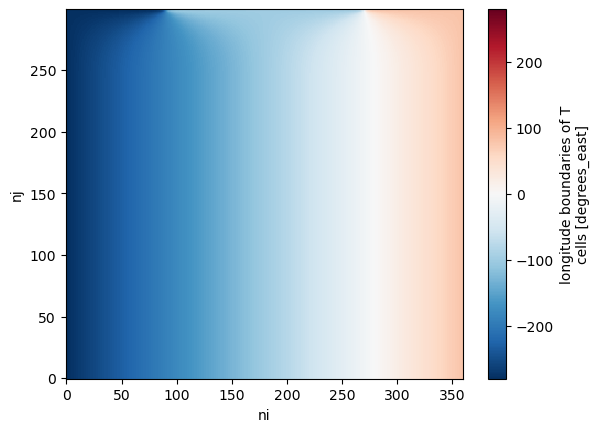

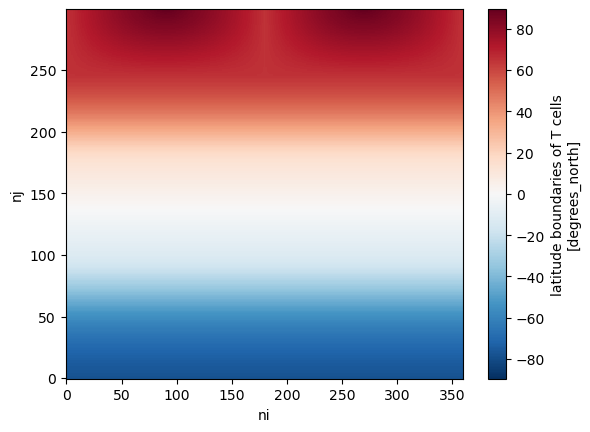

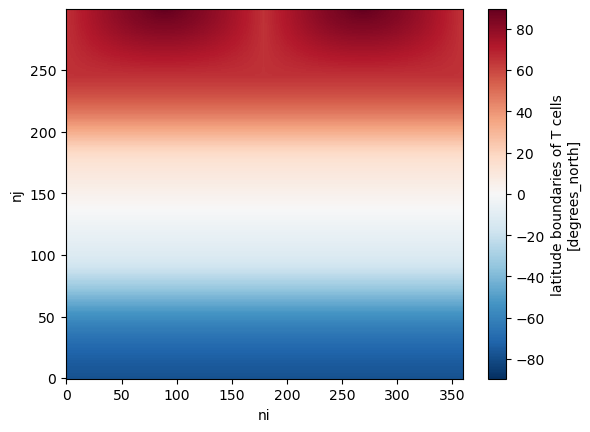

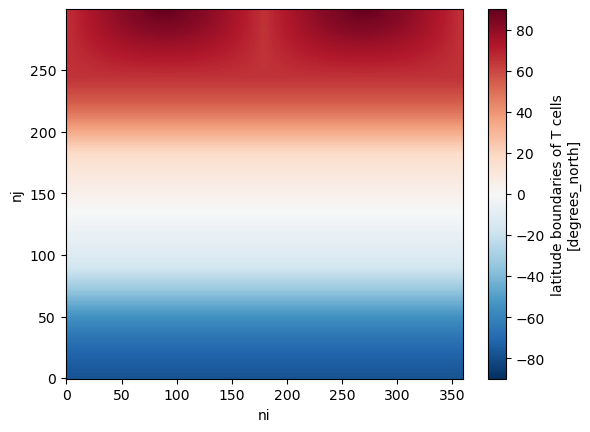

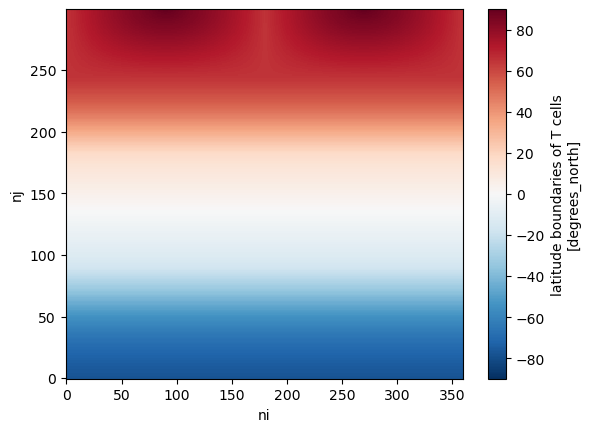

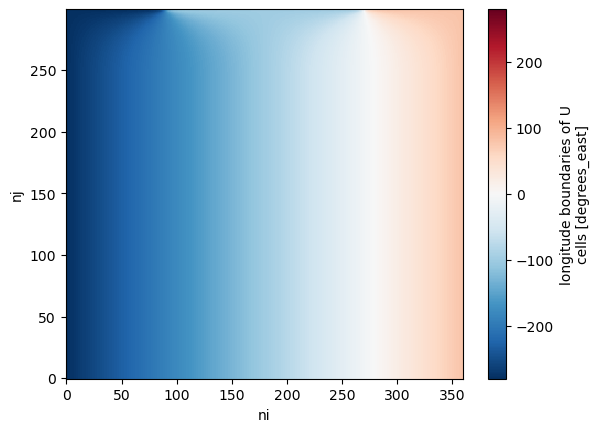

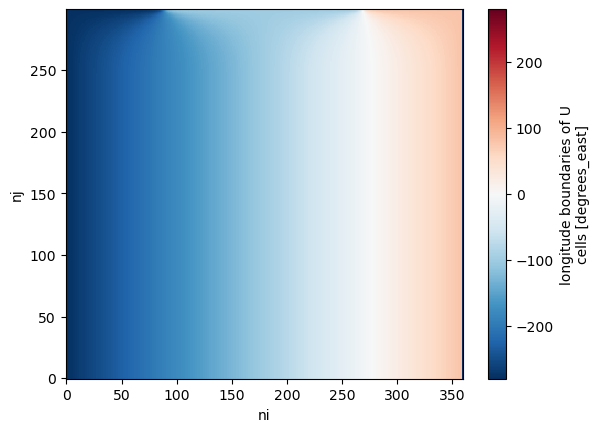

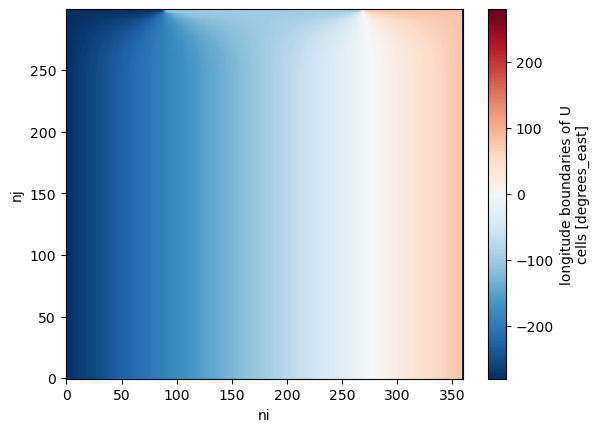

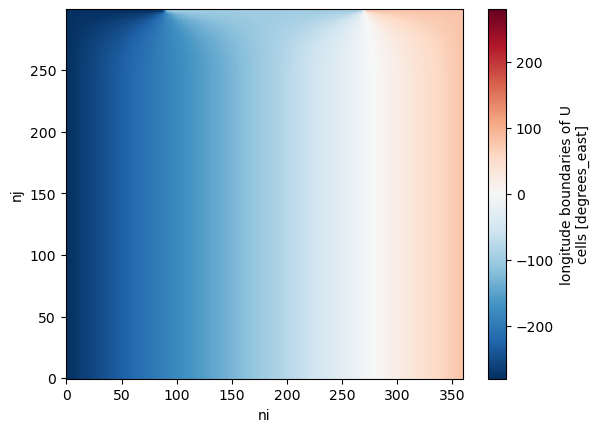

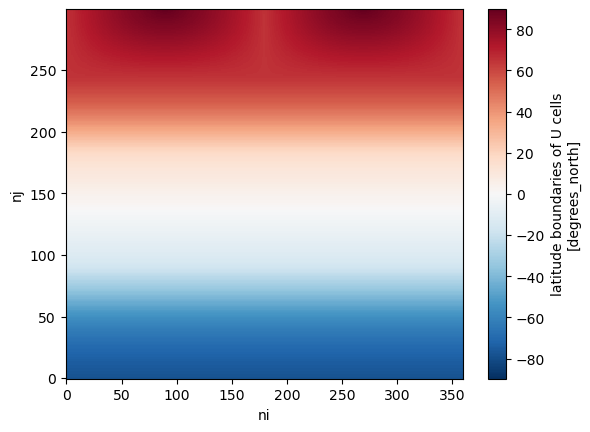

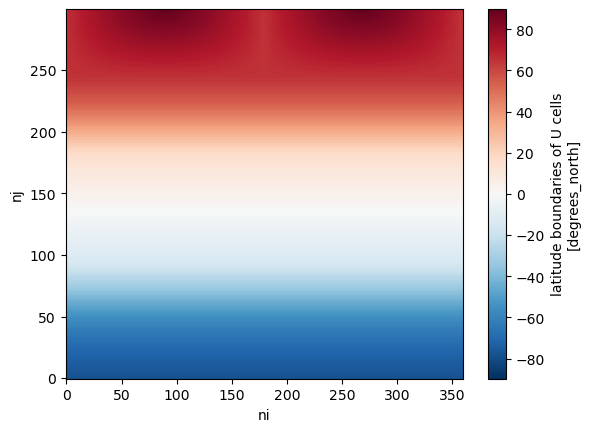

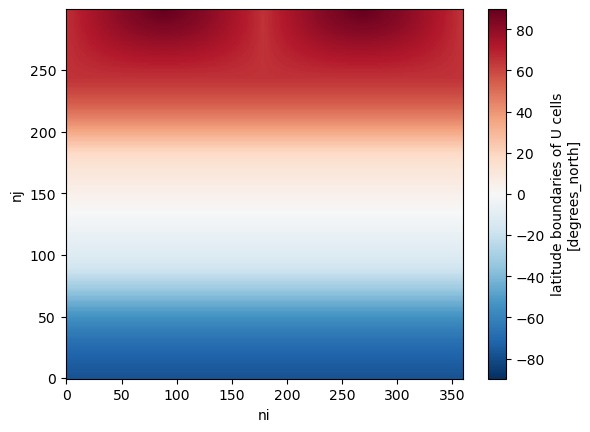

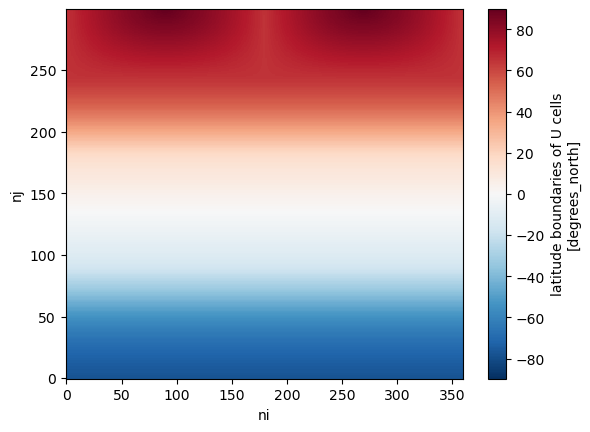

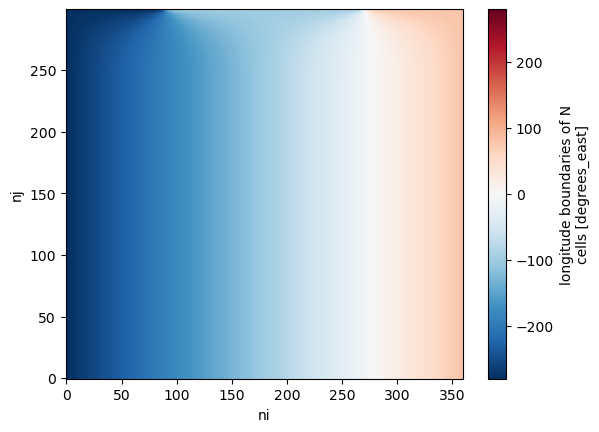

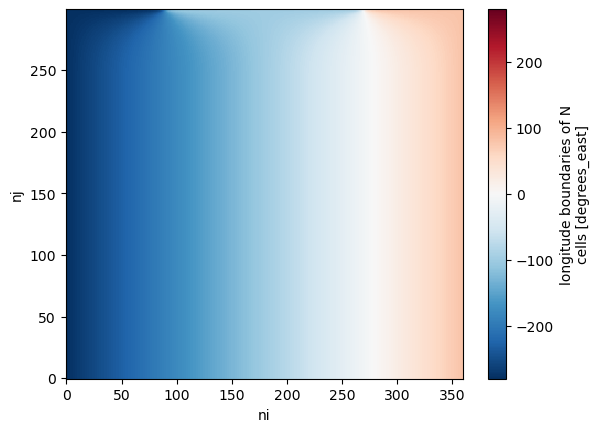

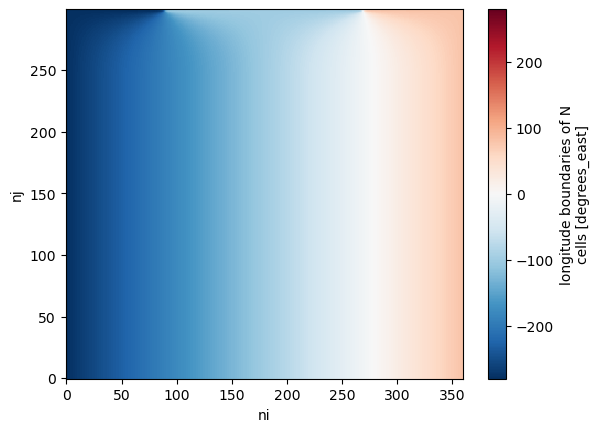

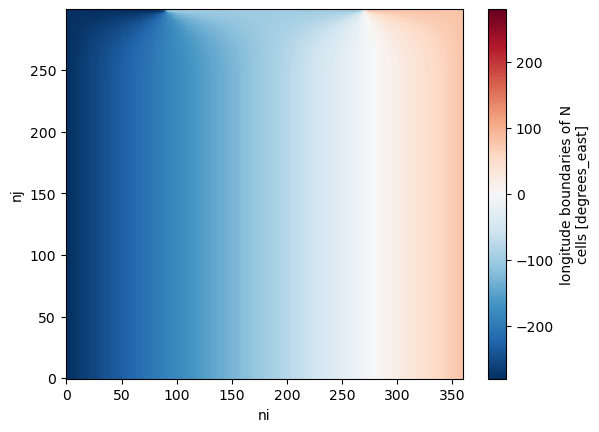

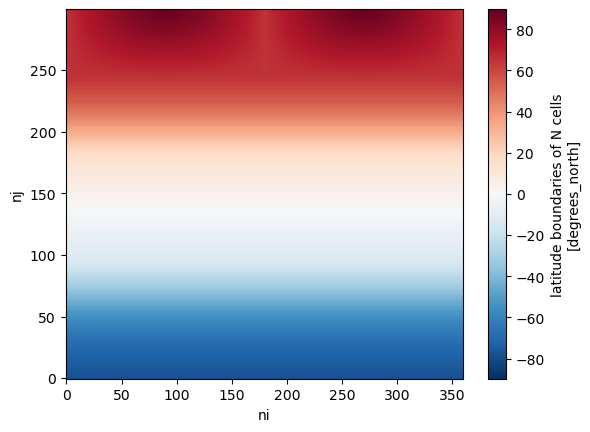

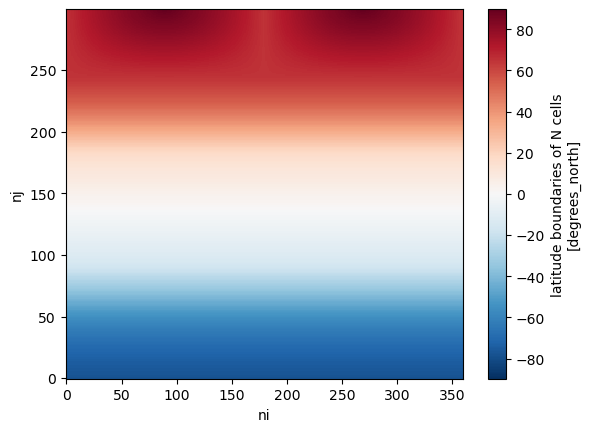

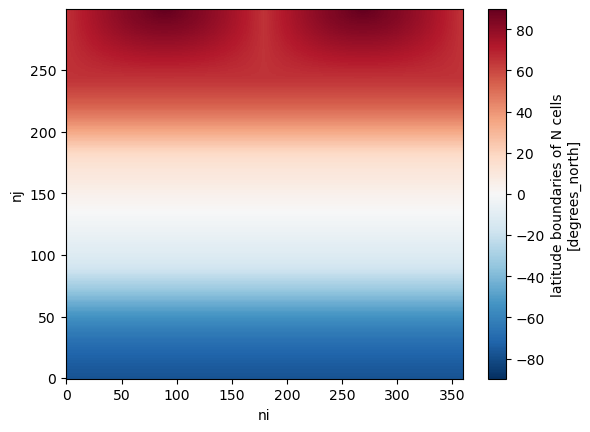

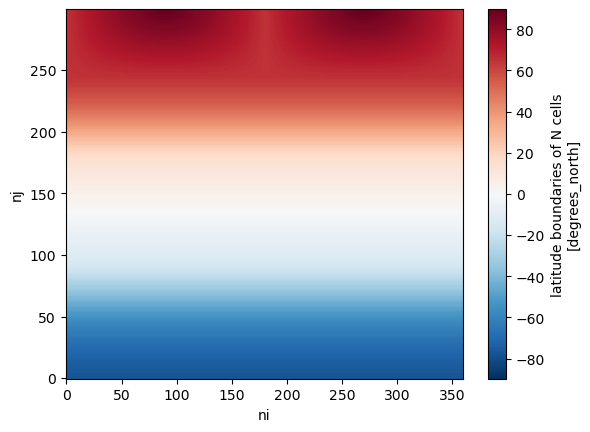

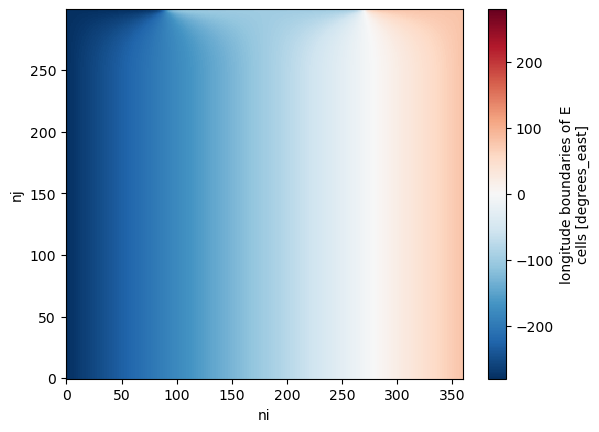

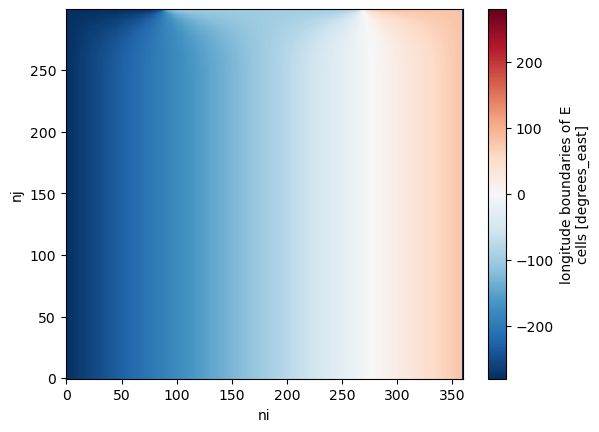

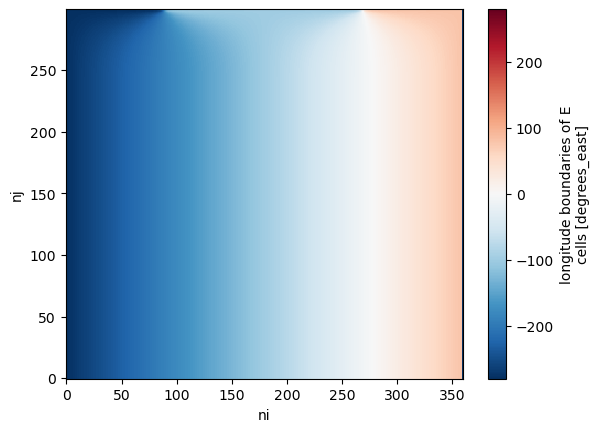

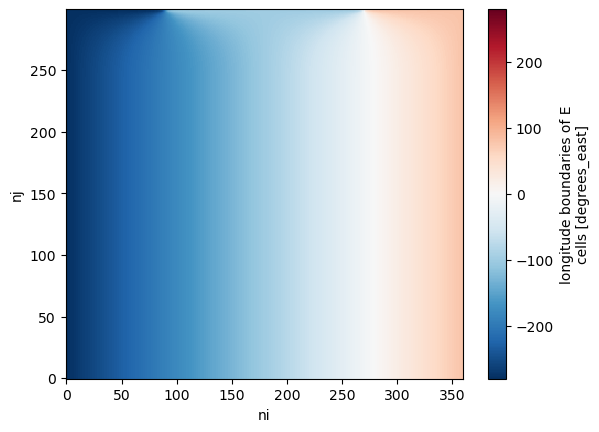

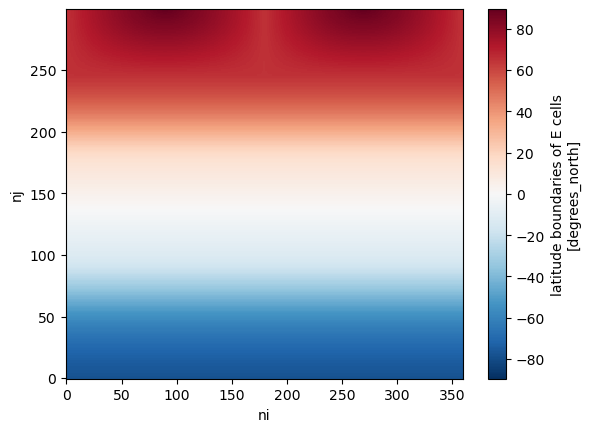

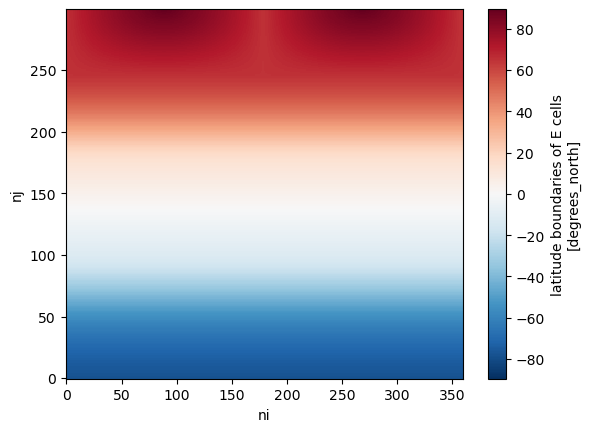

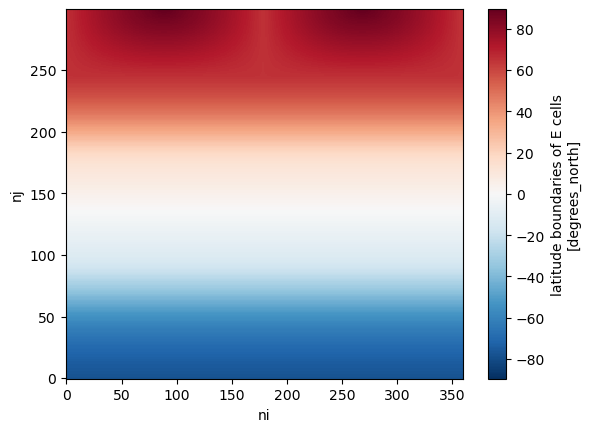

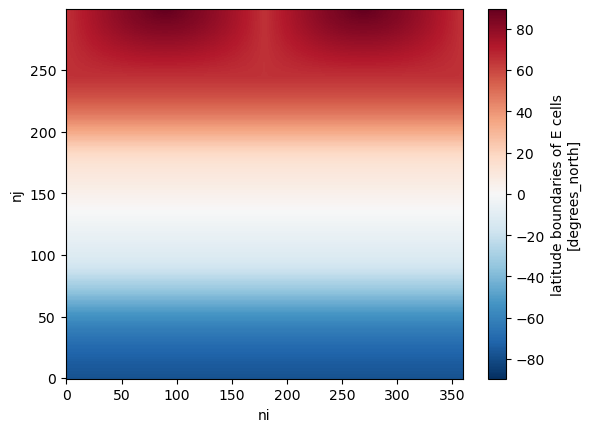

In [25]:
for g in bounds_vars:
    for nvetices in range(0,4):
        cice_ds[g].isel(nvertices=nvetices).plot()
        plt.show()

Work from bounds back to LAT / LON

1. ULAT is NE corner of T cells

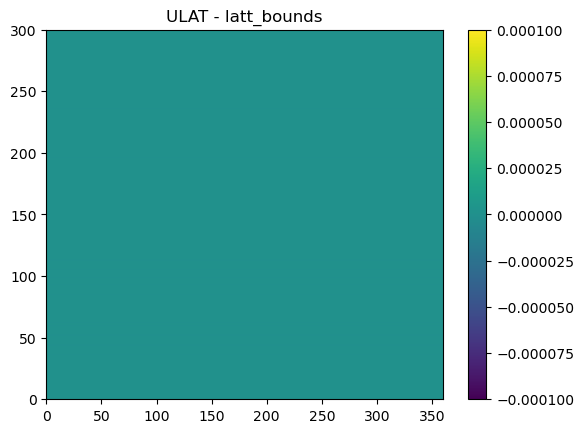

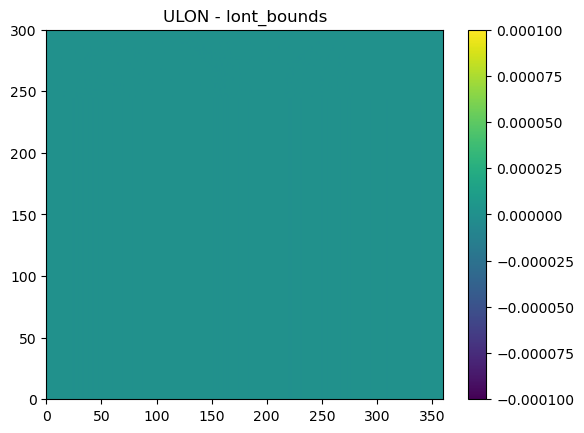

In [26]:
var_map = [
    ('ULAT','latt_bounds'),
    ('ULON','lont_bounds'),
]


for c,m in var_map:
    plt.pcolor((cice_ds[c].values - cice_ds[m].isel(nvertices=2).values) , vmin=-1e-4, vmax=1e-4)
    plt.colorbar()
    plt.title(f'{c} - {m}')
    plt.show()

TLAT is SW corner of U cells

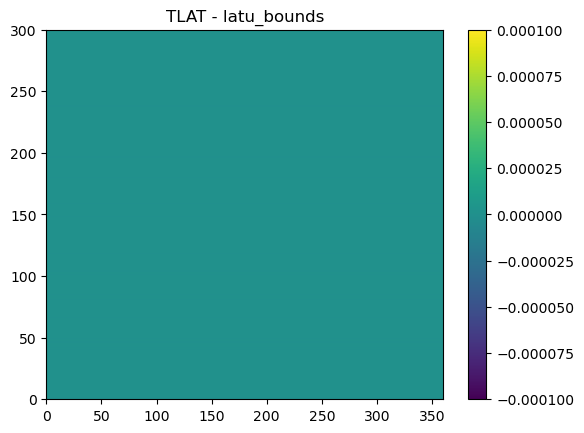

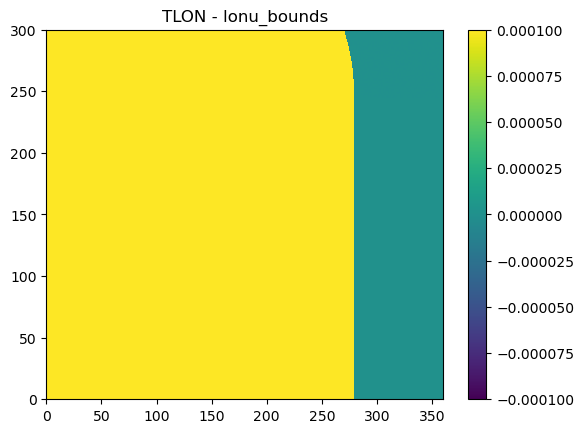

In [27]:
var_map = [
    ('TLAT','latu_bounds'),
    ('TLON','lonu_bounds'),
]


for c,m in var_map:
    plt.pcolor((cice_ds[c].values - cice_ds[m].isel(nvertices=0).values) , vmin=-1e-4, vmax=1e-4)
    plt.colorbar()
    plt.title(f'{c} - {m}')
    plt.show()

ELAT is SE corner of N cells

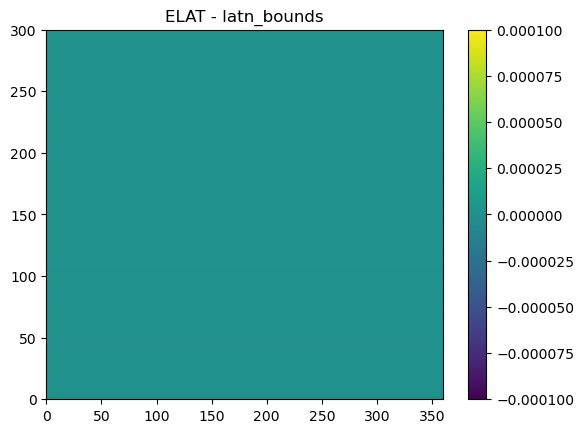

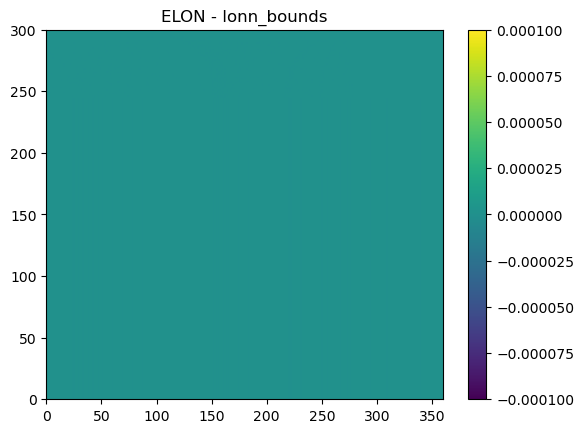

In [28]:
var_map = [
    ('ELAT','latn_bounds'),
    ('ELON','lonn_bounds'),
]


for c,m in var_map:
    plt.pcolor((cice_ds[c].values - cice_ds[m].isel(nvertices=1).values) , vmin=-1e-4, vmax=1e-4)
    plt.colorbar()
    plt.title(f'{c} - {m}')
    plt.show()

NLAT is NW corner of E cells

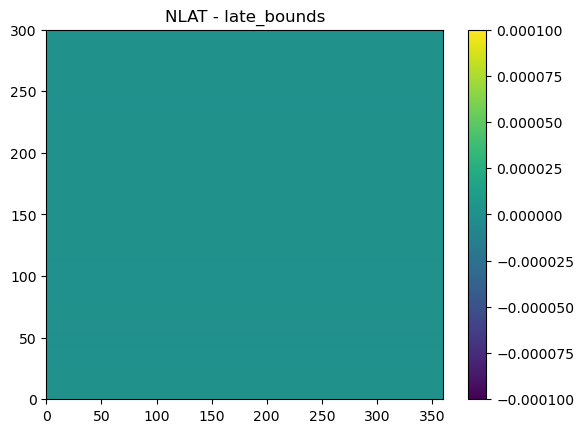

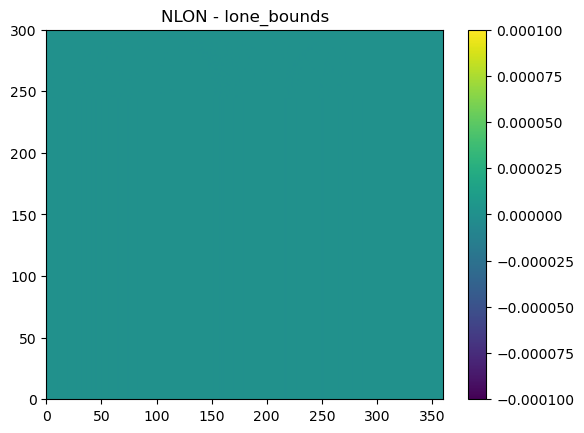

In [29]:
var_map = [
    ('NLAT','late_bounds'),
    ('NLON','lone_bounds'),
]


for c,m in var_map:
    plt.pcolor((cice_ds[c].values - cice_ds[m].isel(nvertices=3).values) , vmin=-1e-4, vmax=1e-4)
    plt.colorbar()
    plt.title(f'{c} - {m}')
    plt.show()

And the mediator areas:

In [30]:
mesh_med = xr.open_dataset('/g/data/vk83/configurations/inputs/access-om3/share/meshes/global.1deg/2024.01.25/access-om2-1deg-ESMFmesh.nc')

In [31]:
mesh_med

<xarray.Dataset> Size: 7MB
Dimensions:         (nodeCount: 108071, coordDim: 2, elementCount: 108000,
                     maxNodePElement: 4)
Dimensions without coordinates: nodeCount, coordDim, elementCount,
                                maxNodePElement
Data variables:
    nodeCoords      (nodeCount, coordDim) float64 2MB ...
    elementConn     (elementCount, maxNodePElement) int32 2MB ...
    numElementConn  (elementCount) int32 432kB ...
    centerCoords    (elementCount, coordDim) float64 2MB ...
    elementMask     (elementCount) int8 108kB ...
    elementArea     (elementCount) float64 864kB ...
Attributes:
    gridType:       unstructured mesh
    timeGenerated:  2024-01-25 15:01:40.899669
    created_by:     ds0092
    inputFile:      /g/data/ik11/inputs/access-om2/input_20201102/mom_1deg/oc...
    history:        Created using commit 7b06e94dc79684c8e5b0d33a36d8046d42e9...

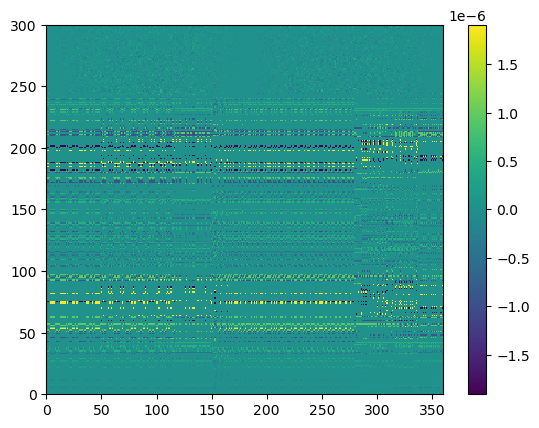

In [32]:
plt.pcolor((mesh_med.elementArea).values.reshape(300,360) - cice_ds.tarea.values)

plt.colorbar()

In [33]:
R = 6.37122e6

In [34]:
mesh_lon = mesh_med.centerCoords.isel(coordDim=0).values.reshape(300,360)

In [35]:
mesh_lat = mesh_med.centerCoords.isel(coordDim=1).values.reshape(300,360)

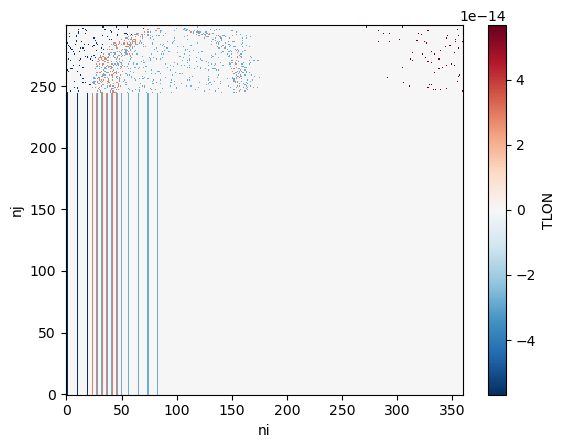

In [36]:
(cice_ds.TLON-mesh_lon).plot()

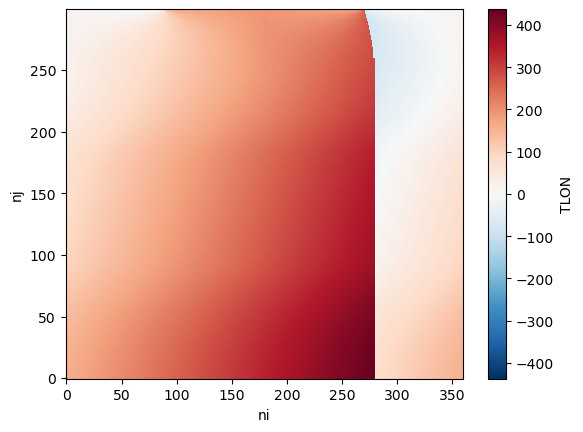

In [37]:
(cice_ds.TLON-mesh_lat).plot()

In [38]:
mesh_areas = mesh_med.elementArea.values.reshape(300,360)

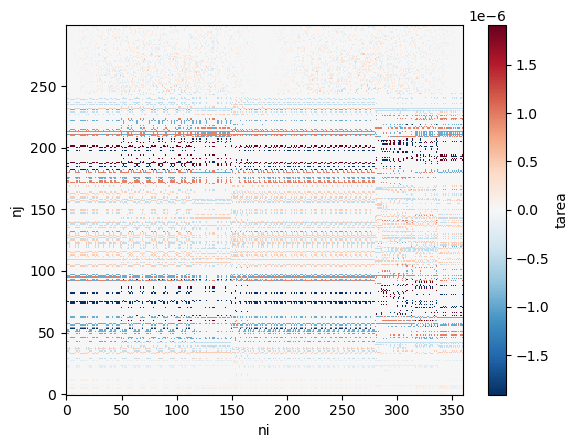

In [40]:
(cice_ds.tarea - mesh_areas).plot()

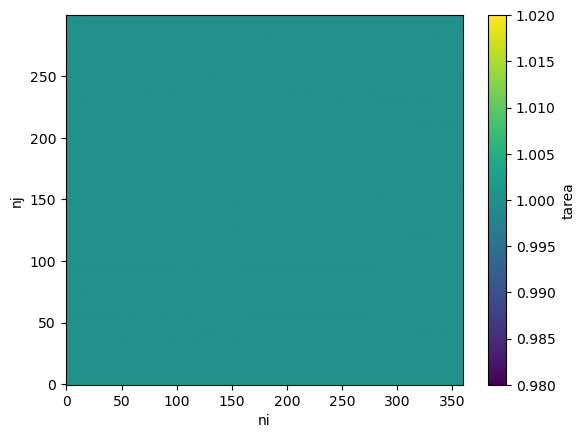

In [41]:
(cice_ds.tarea / mesh_areas).plot(vmin=0.98, vmax=1.02)

In [43]:
med = xr.open_dataset('/g/data/tm70/as2285/payu/MOM6-CICE6/archive/output000/access-om3.cpl.hx.ice.3h.avrg.1900-01-01-10800.nc')

In [44]:
med

<xarray.Dataset> Size: 256MB
Dimensions:                (time: 8, ntb: 2, iceImp_ny: 300, iceImp_nx: 360)
Coordinates:
  * time                   (time) object 64B 1900-01-01 01:30:00 ... 1900-01-...
Dimensions without coordinates: ntb, iceImp_ny, iceImp_nx
Data variables: (12/38)
    time_bnds              (time, ntb) float64 128B ...
    iceImp_Faii_evap       (time, iceImp_ny, iceImp_nx) float64 7MB ...
    iceImp_Faii_lat        (time, iceImp_ny, iceImp_nx) float64 7MB ...
    iceImp_Faii_lwup       (time, iceImp_ny, iceImp_nx) float64 7MB ...
    iceImp_Faii_sen        (time, iceImp_ny, iceImp_nx) float64 7MB ...
    iceImp_Faii_swnet      (time, iceImp_ny, iceImp_nx) float64 7MB ...
    ...                     ...
    iceImp_Si_tref         (time, iceImp_ny, iceImp_nx) float64 7MB ...
    iceImp_Si_u10          (time, iceImp_ny, iceImp_nx) float64 7MB ...
    iceImp_Si_vice         (time, iceImp_ny, iceImp_nx) float64 7MB ...
    iceImp_Si_vsno         (time, iceImp_ny, iceImp_nx) float64 7MB ...
    iceImp_lon             (time, iceImp_ny, iceImp_nx) float64 7MB ...
    iceImp_lat             (time, iceImp_ny, iceImp_nx) float64 7MB ...
Attributes:
    file_version:   cmeps0
    model_doi_url:  unset

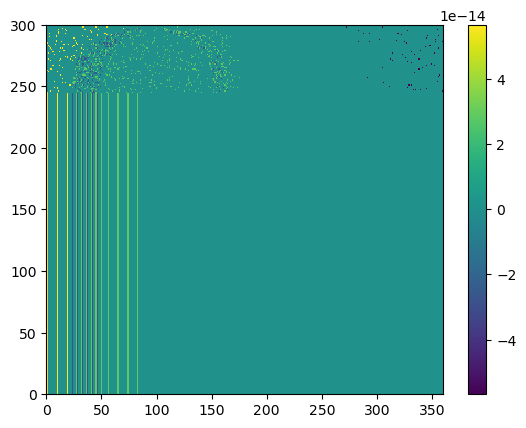

In [49]:
plt.pcolor(med.iceImp_lon.isel(time=0).values-cice_ds.TLON.values)
plt.colorbar()

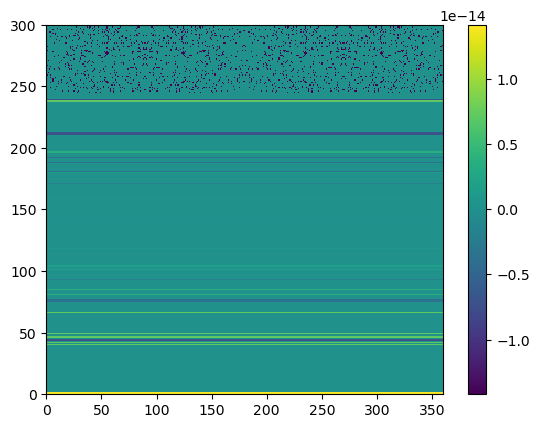

In [50]:
plt.pcolor(med.iceImp_lat.isel(time=0).values-cice_ds.TLAT.values)
plt.colorbar()

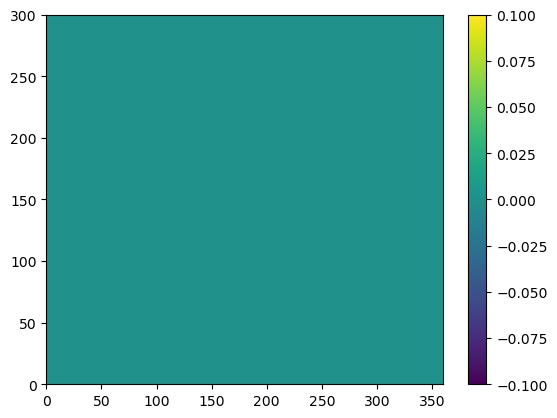

In [51]:
plt.pcolor(mesh_med.elementMask.values.reshape(300,360) - cice_ds.tmask.values )
plt.colorbar()

In [45]:
mediator_area = med.iceImp_Si_mesharea.isel(time=0)*R*R

In [56]:
mediator_area.max()

<xarray.DataArray 'iceImp_Si_mesharea' ()> Size: 8B
array(1.08424159e+10)
Coordinates:
    time     object 8B 1900-01-01 01:30:00

The internally calculated mediator areas vs the cice areas are a bit different, although in the 5th significant figure:

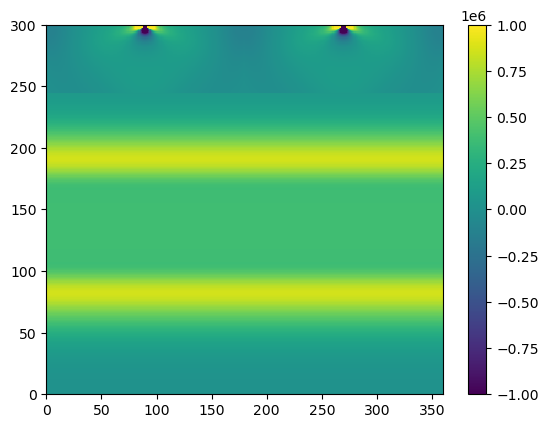

In [60]:
plt.pcolor((mediator_area).values - cice_ds.tarea.values, vmin=-1e6, vmax=1e6)
plt.colorbar()

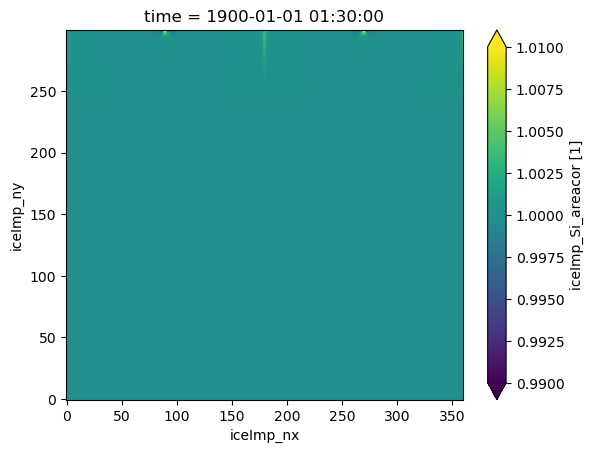

In [63]:
med.iceImp_Si_areacor.isel(time=0).plot(vmin=0.99, vmax=1.01)

In [53]:
med.iceImp_Si_areacor.isel(time=0).min()

<xarray.DataArray 'iceImp_Si_areacor' ()> Size: 8B
array(0.98115508)
Coordinates:
    time     object 8B 1900-01-01 01:30:00

In [54]:
med.iceImp_Si_areacor.isel(time=0).max()

<xarray.DataArray 'iceImp_Si_areacor' ()> Size: 8B
array(1.06782439)
Coordinates:
    time     object 8B 1900-01-01 01:30:00